In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# 生成数据集及其标签
def synthetic_data(w, b, num_example):
    X = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, lables = synthetic_data(true_w, true_b, 1000)

features: tensor([-0.6160, -0.2804]) 
lables: tensor([3.9175])


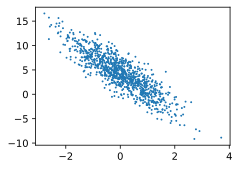

In [3]:
print("features:", features[0], "\nlables:", lables[0])
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), lables.detach().numpy(), 1)

In [4]:
# 定义一个data_iter函数，该函数接收批量大小、特征向量和标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size, features, lables):
    num_example = len(features)
    indices = list(range(num_example))
    # 这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_example, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_example)])
        yield features[batch_indices], lables[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, lables):
    print(X, "\n", y)
    break

tensor([[-1.4246, -0.5501],
        [-0.1141, -0.0412],
        [ 0.6575,  0.1467],
        [-2.1233,  1.5129],
        [-0.0893, -0.2437],
        [ 0.0905,  0.4351],
        [ 0.4144, -1.4746],
        [-0.1838, -0.2332],
        [-0.0245,  1.8216],
        [ 1.1437, -0.8387]]) 
 tensor([[ 3.1997],
        [ 4.1073],
        [ 5.0250],
        [-5.1814],
        [ 4.8623],
        [ 2.8994],
        [10.0312],
        [ 4.6338],
        [-2.0308],
        [ 9.3255]])


In [5]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
# 定义模型
def linreg(X, w, b):
    # 线性回归模型
    return torch.matmul(X, w) + b

In [7]:
# 定义损失函数
def Squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [8]:
# 定义优化算法
def sgd(params, lr, batch_size):
    # 小批量随机梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
# 训练过程
lr = 0.03  # 学习率
num_epochs = 3  # 总共扫3遍
net = linreg  # 模型：线性回归模型
loss = Squared_loss  # 损失：均方损失


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, lables):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), lables)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.000156
epoch2,loss0.000048
epoch3,loss0.000047
